<div class="alert alert-block alert-info">
    <b>Tip:</b> Hello Team
</div>

# <font color='blue'>Hackathon   Baker Hughes.</font> 

## DS Hackathon 2022 - Predictive Modeling

### Team: Serival Tree Team


## Exploratory data
> - Data Frame
> - Heatmap is null
> - Subplots
> - Heatmap 
> - Box plot

## Data preprocessing
> - Select variables
> - MinMaxScaler
> - Split training and test set

## NN
> - Build NN Model
> - Fitting the training set
> - Metrics

## Predictions
> 


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt 
import plotly.express as px
import plotly.graph_objects as go 
from plotly.subplots import make_subplots 
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# <font color='pink'>Exploratory Data Analysis</font>  

### <font color='pink'>Data frame</font>  

In [2]:
df = pd.read_csv('Datos_full.csv')

df_test = pd.read_csv('test_data_123.csv')

In [3]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
df.head()

date      T_AMB     P_AMB   CMP_SPEED       CDP      GGDP  \
0  2021-01-01  17.309506  0.948579     0.00000  0.948579  0.948579   
1  2021-01-02  18.011018  0.948324     0.00000  0.948324  0.948324   
2  2021-01-03  25.274782  0.948593     0.00000  0.948593  0.948593   
3  2021-01-04  31.274884  0.949056  2116.69558  2.517862  1.366369   
4  2021-01-05  30.534875  0.949134     0.00000  0.949134  0.949134   

        HPT_IT         CDT      LPT_IT       EXH_T         RH      WAR  \
0          NaN   17.309506         NaN         NaN  54.263837  0.00007   
1          NaN   18.011018         NaN         NaN  51.751306  0.00007   
2          NaN   25.274782         NaN         NaN  33.529122  0.00007   
3  1189.725775  114.011718  858.778442  602.701668  23.330789  0.00007   
4          NaN   30.534875         NaN         NaN  24.375684  0.00007   

          POWER       FILE_ID CUSTOMER_NAME        PLANT_NAME   LATITUDE  \
0           NaN  data_011.csv       FERVENT  PERFECT-MACKEREL -23.067557   
1           NaN  data_011.csv       FERVENT  PERFECT-MACKEREL -23.067557   
2           NaN  data_011.csv       FERVENT  PERFECT-MACKEREL -23.067557   
3  10723.120355  data_011.csv       FERVENT  PERFECT-MACKEREL -23.067557   
4           NaN  data_011.csv       FERVENT  PERFECT-MACKEREL -23.067557   

    LONGITUDE   ELEVATION ENGINE_ID  
0  130.962138  567.625122  ENGINE_1  
1  130.962138  567.625122  ENGINE_1  
2  130.962138  567.625122  ENGINE_1  
3  130.962138  567.625122  ENGINE_1  
4  130.962138  567.625122  ENGINE_1

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5490 entries, 0 to 5489
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           5490 non-null   object 
 1   T_AMB          5490 non-null   float64
 2   P_AMB          5490 non-null   float64
 3   CMP_SPEED      5490 non-null   float64
 4   CDP            5490 non-null   float64
 5   GGDP           5490 non-null   float64
 6   HPT_IT         4337 non-null   float64
 7   CDT            5490 non-null   float64
 8   LPT_IT         4337 non-null   float64
 9   EXH_T          4337 non-null   float64
 10  RH             5490 non-null   float64
 11  WAR            5490 non-null   float64
 12  POWER          4337 non-null   float64
 13  FILE_ID        5490 non-null   object 
 14  CUSTOMER_NAME  5490 non-null   object 
 15  PLANT_NAME     5490 non-null   object 
 16  LATITUDE       5490 non-null   float64
 17  LONGITUDE      5490 non-null   float64
 18  ELEVATIO

### <font color='pink'>Heatmap isnull</font>

<AxesSubplot:>

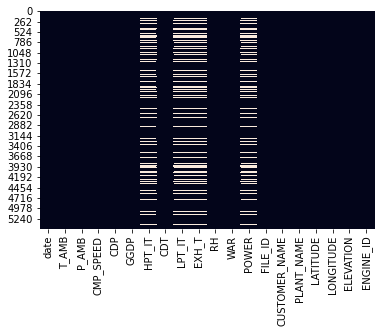

In [6]:
sns.heatmap(df.isnull(), cbar=False)

### <font color='pink'>Subplots</font>

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

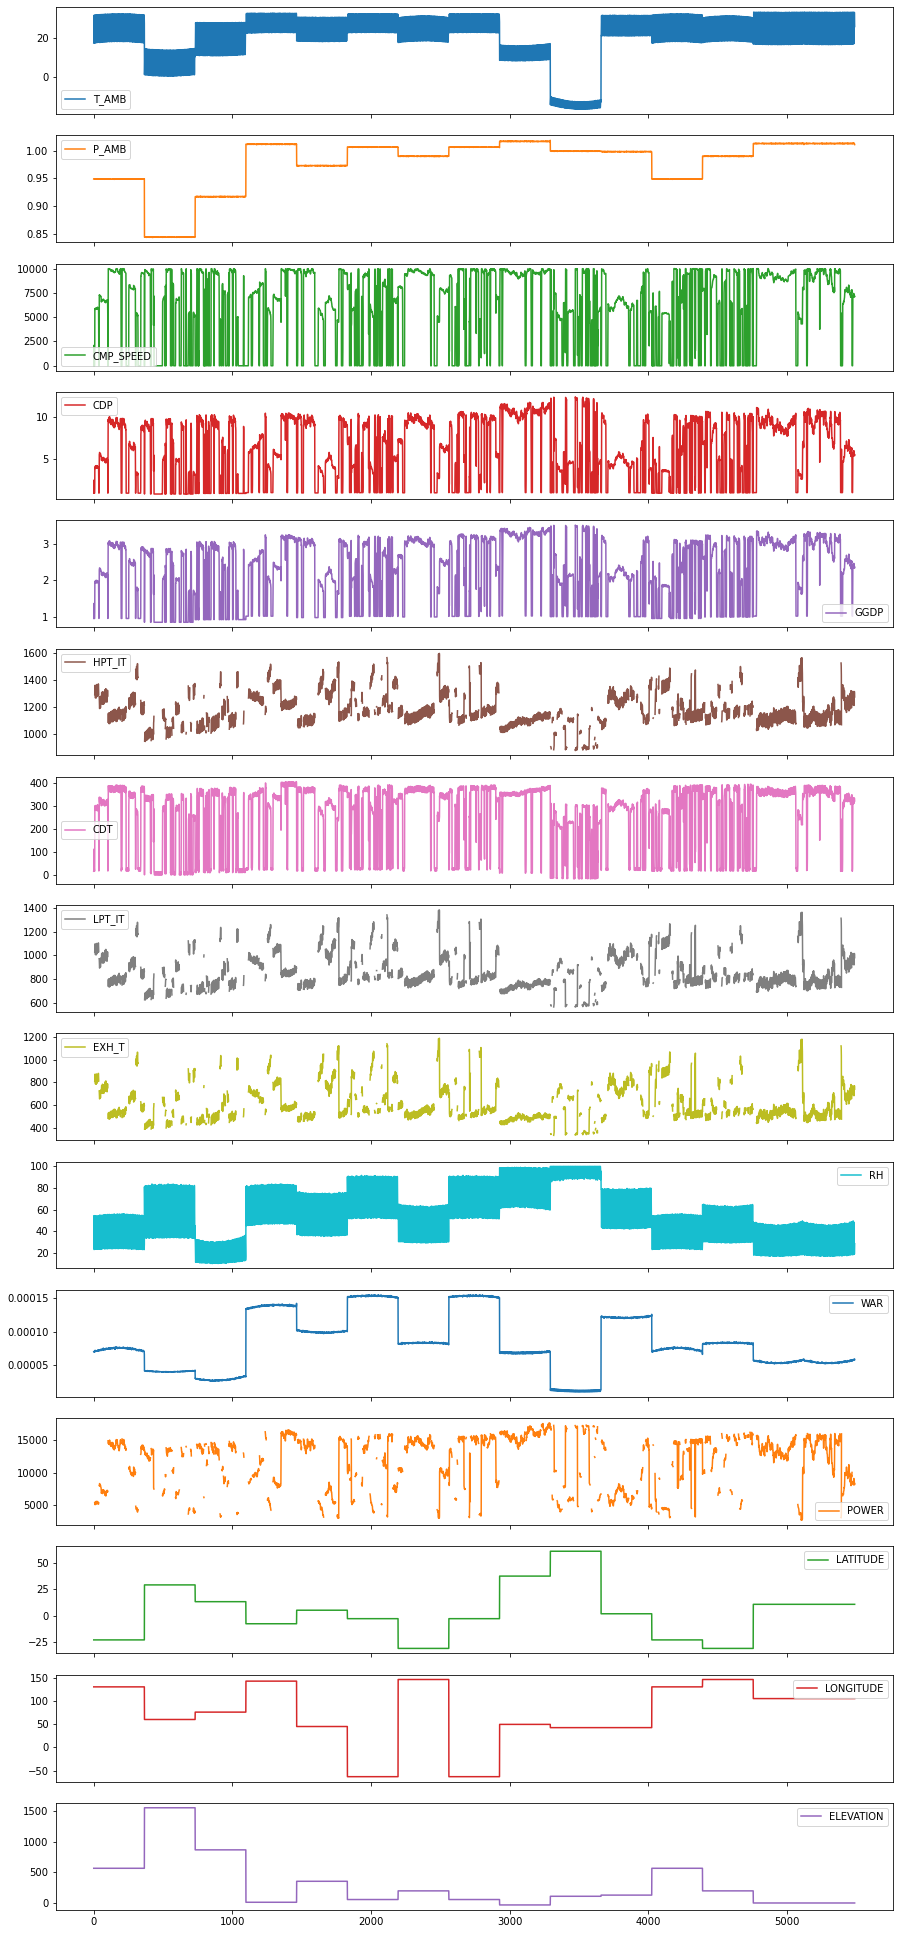

In [7]:
df.plot(subplots=True, figsize=(15, 35))

### <font color='pink'>Heatmap isnull</font>

In [8]:
df.dropna(subset=['POWER'], inplace = True)

<AxesSubplot:>

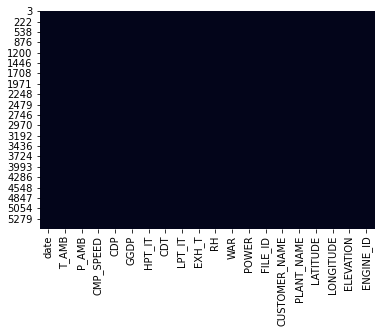

In [9]:
sns.heatmap(df.isnull(), cbar=False)

### <font color='pink'>Subplots</font>

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

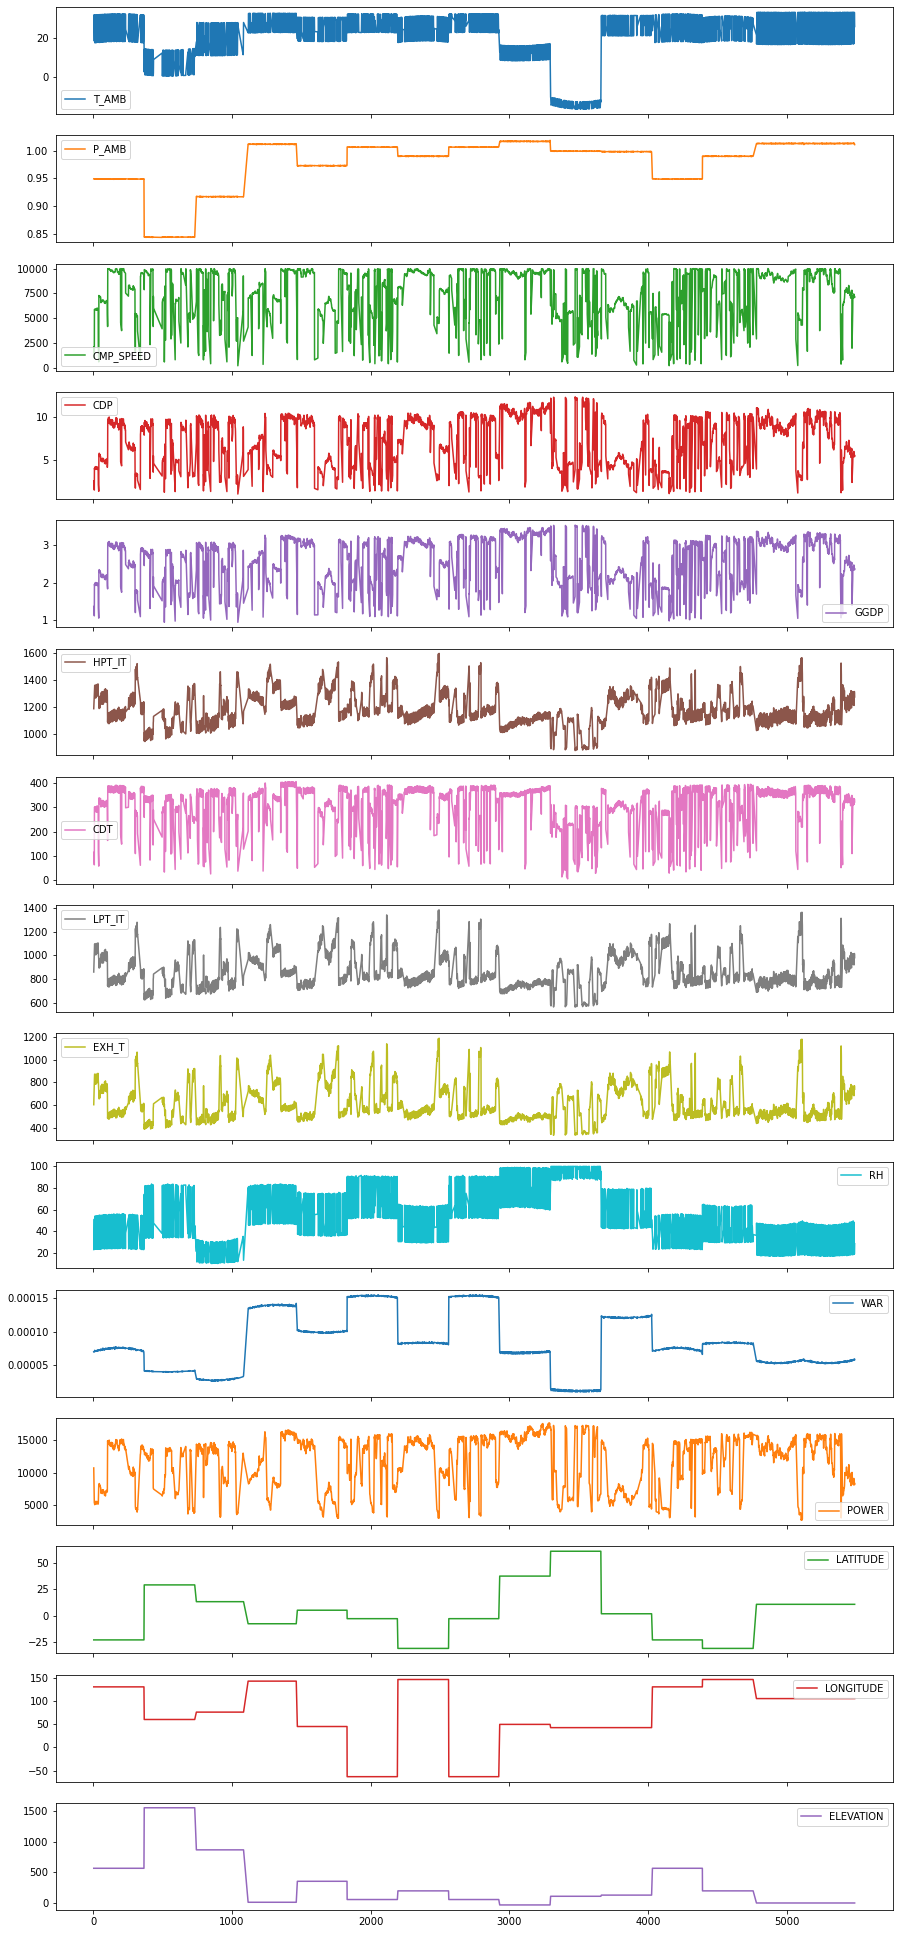

In [10]:
df.plot(subplots=True, figsize=(15, 35))

### <font color='pink'>Heatmap</font>

<AxesSubplot:>

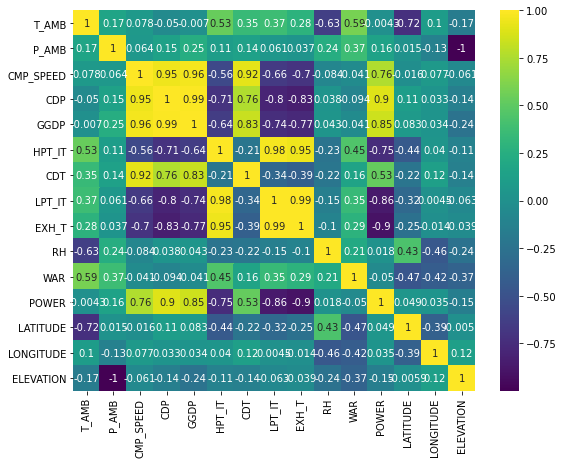

In [11]:
plt.figure(figsize=[9, 7])
sns.heatmap(df.corr(), annot=True,  cmap='viridis')

### <font color='pink'>Boxplot</font>

In [12]:
df.drop(['date', 'FILE_ID', 'CUSTOMER_NAME', 'PLANT_NAME', 'ENGINE_ID'], axis=1, inplace=True)


In [13]:
df

T_AMB     P_AMB    CMP_SPEED       CDP      GGDP       HPT_IT  \
3     31.274884  0.949056  2116.695580  2.517862  1.366369  1189.725775   
7     18.288121  0.948821   978.556392  1.473576  1.119308  1294.798899   
8     25.223891  0.948301  5880.739454  4.034103  1.955884  1323.361553   
9     31.395950  0.948563  5879.171712  3.942279  1.933775  1363.030711   
10    30.571140  0.949028  5796.235938  3.869324  1.916154  1363.870128   
...         ...       ...          ...       ...       ...          ...   
5485  20.307471  1.013321  7116.972972  5.629311  2.388327  1244.016668   
5486  28.343975  1.013461  7308.824305  5.696878  2.402782  1282.006073   
5487  32.697902  1.012772  7181.782869  5.433968  2.345857  1317.309104   
5488  29.283855  1.012586  7081.029073  5.376616  2.333218  1302.945933   
5489  25.590817  1.010935  7130.141390  5.509001  2.359924  1276.959249   

             CDT       LPT_IT       EXH_T         RH       WAR         POWER  \
3     114.011718   858.778442  602.701668  23.330789  0.000070  10723.120355   
7      62.574187  1029.082508  808.396420  51.394163  0.000070   5410.938821   
8     293.291081  1055.294364  832.238958  33.723968  0.000070   5340.793770   
9     302.155494  1092.271166  866.317885  23.646899  0.000071   5229.187256   
10    298.168565  1096.272703  872.427207  25.121450  0.000072   5090.641518   
...          ...          ...         ...        ...       ...           ...   
5485  314.023804   950.300334  713.448132  40.036185  0.000058   8452.584691   
5486  331.283314   979.066734  735.141174  24.664249  0.000058   8688.065930   
5487  335.050998  1014.956008  770.085308  19.166872  0.000058   8276.514264   
5488  327.291755  1004.938033  763.281809  23.798122  0.000059   8133.709302   
5489  322.761120   979.788946  739.588943  28.715465  0.000058   8327.396036   

       LATITUDE   LONGITUDE   ELEVATION  
3    -23.067557  130.962138  567.625122  
7    -23.067557  130.962138  567.625122  
8    -23.067557  130.962138  567.625122  
9    -23.067557  130.962138  567.625122  
10   -23.067557  130.962138  567.625122  
...         ...         ...         ...  
5485  10.742003  105.652455    2.824768  
5486  10.742003  105.652455    2.824768  
5487  10.742003  105.652455    2.824768  
5488  10.742003  105.652455    2.824768  
5489  10.742003  105.652455    2.824768  

[4337 rows x 15 columns]

In [14]:
columns = df.columns.tolist()

### <font color='pink'>Boxplot</font>

In [15]:
CMP_SPEED = df['CMP_SPEED'].values 
CDP = df['CDP'].values 
GGDP = df['GGDP'].values
HPT_IT = df['HPT_IT'].values 
CDT = df['CDT'].values 
LPT_IT = df['LPT_IT'].values 
EXH_T = df['EXH_T'].values 
POWER = df['POWER'].values 

<div class="alert alert-block alert-warning">
<b>Note:</b> The cell below contains a chart made in plotly, to visualize you must run the code.
</div>

In [16]:
fig = make_subplots(rows=1, cols=8,
                   subplot_titles=('CMP_SPEED', 'CDP', 'GGDP', 'HPT_IT', 'CDT', 'LPT_IT', 'EXH_T', 'POWER'))

# plotting depth 
fig.append_trace(go.Box(
    y=CMP_SPEED,
    name='CMP_SPEED',
), row=1, col=1)
fig.update_yaxes(row=1, col=1, autorange='reversed')

# plotting the graph of shale volume against depth 
fig.append_trace(go.Box(
    y=CDP,
    name='CDP',
), row=1, col=2)
fig.update_yaxes(row=1, col=2, autorange='reversed')

# plotting the graph of resitivity against depth 
fig.append_trace(go.Box(
    y=GGDP, 
    name='GGDP', 
), row=1, col=3)
fig.update_yaxes(row=1, col=3, autorange='reversed')

# plotting the graph of temperature against depth 
fig.append_trace(go.Box(
    y=HPT_IT,
    name='HPT_IT', 
), row=1, col=4)
fig.update_yaxes(row=1, col=4, autorange='reversed')

# plotting the graph of temperature against depth 
fig.append_trace(go.Box(
    y=CDT,
    name='CDT', 
), row=1, col=5)
fig.update_yaxes(row=1, col=5, autorange='reversed')

# plotting the graph of temperature against depth 
fig.append_trace(go.Box(
    y=LPT_IT,
    name='LPT_IT', 
), row=1, col=6)
fig.update_yaxes(row=1, col=6, autorange='reversed')

# plotting the graph of temperature against depth 
fig.append_trace(go.Box(
    y=EXH_T,
    name='EXH_T', 
), row=1, col=7)
fig.update_yaxes(row=1, col=7, autorange='reversed')

# plotting POWER
fig.append_trace(go.Box(
    y=POWER,
    name='POWER', 
), row=1, col=8)
fig.update_yaxes(row=1, col=8, autorange='reversed')

fig.update_layout(height=800, width=1000, title_text="Well Log Exploratory Data Analysis")

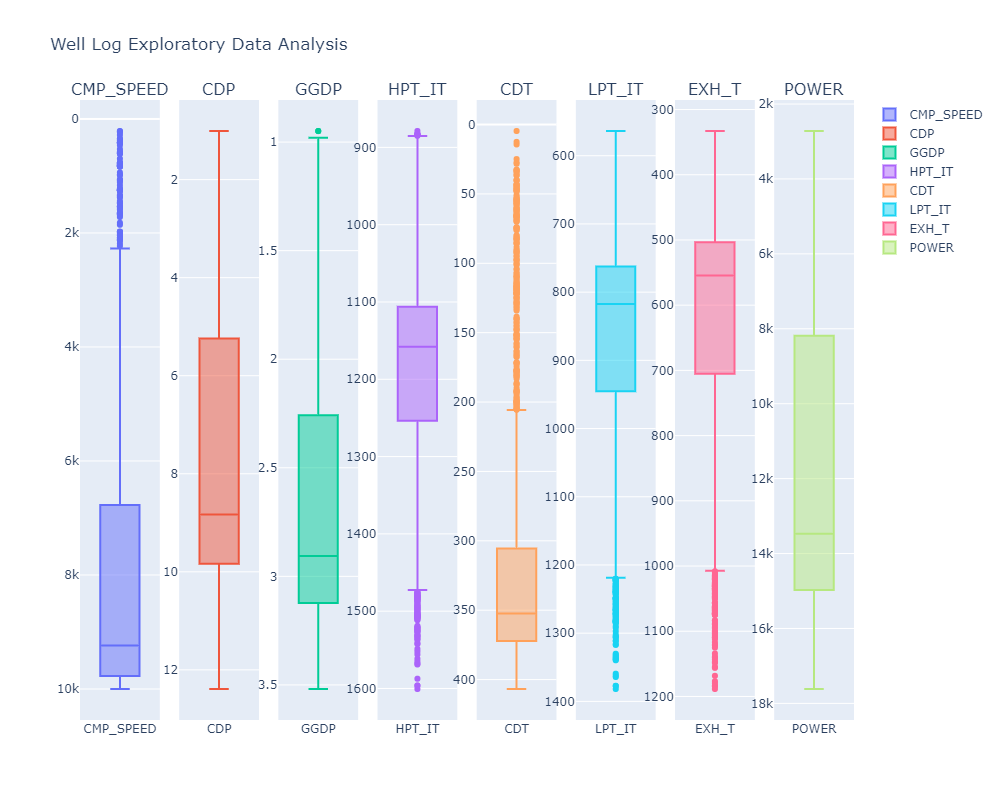

# <font color='pink'>Correlation</font>

In [17]:
for i in columns:
    pearson_coef, p_value = stats.pearsonr(df[i], df['POWER'])
    print(f"The Pearson Corr Coeff for: {i}, \t is: {pearson_coef}, \t with a P-value of P =: {p_value}")

The Pearson Corr Coeff for: T_AMB, 	 is: -0.004338052436894841, 	 with a P-value of P =: 0.7751804017287472
The Pearson Corr Coeff for: P_AMB, 	 is: 0.15548342293580722, 	 with a P-value of P =: 7.101880447391001e-25
The Pearson Corr Coeff for: CMP_SPEED, 	 is: 0.7581514451924924, 	 with a P-value of P =: 0.0
The Pearson Corr Coeff for: CDP, 	 is: 0.8987431538370809, 	 with a P-value of P =: 0.0
The Pearson Corr Coeff for: GGDP, 	 is: 0.8469110057899302, 	 with a P-value of P =: 0.0
The Pearson Corr Coeff for: HPT_IT, 	 is: -0.7467060745106955, 	 with a P-value of P =: 0.0
The Pearson Corr Coeff for: CDT, 	 is: 0.5255264538434647, 	 with a P-value of P =: 1.3012927730274283e-306
The Pearson Corr Coeff for: LPT_IT, 	 is: -0.8633572832776322, 	 with a P-value of P =: 0.0
The Pearson Corr Coeff for: EXH_T, 	 is: -0.9032722281679447, 	 with a P-value of P =: 0.0
The Pearson Corr Coeff for: RH, 	 is: 0.017926769806006392, 	 with a P-value of P =: 0.23786575042152536
The Pearson Corr Coeff f

# <font color='pink'>Data Preprocessing</font>

### <font color='pink'>Select variables</font>

In [18]:
df_model = df[['CMP_SPEED', 'CDP', 'GGDP', 'HPT_IT', 'CDT', 'LPT_IT', 'EXH_T', 'POWER']]

In [19]:
df_model.head()

CMP_SPEED       CDP      GGDP       HPT_IT         CDT       LPT_IT  \
3   2116.695580  2.517862  1.366369  1189.725775  114.011718   858.778442   
7    978.556392  1.473576  1.119308  1294.798899   62.574187  1029.082508   
8   5880.739454  4.034103  1.955884  1323.361553  293.291081  1055.294364   
9   5879.171712  3.942279  1.933775  1363.030711  302.155494  1092.271166   
10  5796.235938  3.869324  1.916154  1363.870128  298.168565  1096.272703   

         EXH_T         POWER  
3   602.701668  10723.120355  
7   808.396420   5410.938821  
8   832.238958   5340.793770  
9   866.317885   5229.187256  
10  872.427207   5090.641518

### <font color='pink'>MinMaxScaler</font>

In [20]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(df_model)

In [21]:
training_set_scaled

array([[0.19464653, 0.13259421, 0.16241037, ..., 0.36062879, 0.31528606,
        0.53725402],
       [0.07837494, 0.04084192, 0.06627216, ..., 0.56879916, 0.55568767,
        0.18063829],
       [0.57917891, 0.2658131 , 0.39180593, ..., 0.6008391 , 0.58355316,
        0.17592933],
       ...,
       [0.71209269, 0.38880696, 0.54355449, ..., 0.5515317 , 0.51091233,
        0.37300921],
       [0.70179975, 0.38376796, 0.53863635, ..., 0.53928628, 0.50296088,
        0.36342248],
       [0.70681703, 0.39539945, 0.54902843, ..., 0.50854541, 0.47527031,
        0.37642499]])

In [22]:
X = training_set_scaled[:, 0:6]
Y = training_set_scaled[:, 7]

### <font color='pink'>Split training and test set</font>

In [23]:
# default is 75% / 25% train-test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0)

In [24]:
X_test.shape

(1085, 6)

# <font color='pink'>NN</font>

In [25]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

### <font color='pink'>Build NN Model</font>

In [26]:
def build_model():
    model = keras.Sequential([
        layers.Dense(5, activation = 'relu', input_shape = [6]),
        layers.Dense(5, activation = 'relu'),
        layers.Dense(3, activation = 'relu'),
        layers.Dense(1)
    ])
    
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    
#     tf.keras.optimizers.RMSprop(
#     learning_rate=0.001,
#     rho=0.9,
#     momentum=0.85,
#     epsilon=1e-07,
#     centered=False,
#     name="RMSprop")
    
    
    model.compile(loss = 'mse',
                 optimizer = optimizer,
                 metrics = ['mae', 'mse', 'accuracy', 'mean_absolute_error'])
    
    return model

In [27]:
model = build_model()

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 35        
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 18        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 4         
Total params: 87
Trainable params: 87
Non-trainable params: 0
_________________________________________________________________


### <font color='pink'>Fitting the training set</font>

In [29]:
history = model.fit(X_train, y_train, epochs = 100, validation_split = 0.2)

Epoch 1/100
82/82 [==============================] - 1s 4ms/step - loss: 0.3864 - mae: 0.5605 - mse: 0.3864 - accuracy: 3.8447e-04 - mean_absolute_error: 0.5605 - val_loss: 0.3364 - val_mae: 0.5169 - val_mse: 0.3364 - val_accuracy: 0.0000e+00 - val_mean_absolute_error: 0.5169
Epoch 2/100
82/82 [==============================] - 0s 2ms/step - loss: 0.3001 - mae: 0.4831 - mse: 0.3001 - accuracy: 3.8447e-04 - mean_absolute_error: 0.4831 - val_loss: 0.2605 - val_mae: 0.4475 - val_mse: 0.2605 - val_accuracy: 0.0000e+00 - val_mean_absolute_error: 0.4475
Epoch 3/100
82/82 [==============================] - 0s 2ms/step - loss: 0.2302 - mae: 0.4184 - mse: 0.2302 - accuracy: 3.8447e-04 - mean_absolute_error: 0.4184 - val_loss: 0.1979 - val_mae: 0.3890 - val_mse: 0.1979 - val_accuracy: 0.0000e+00 - val_mean_absolute_error: 0.3890
Epoch 4/100
82/82 [==============================] - 0s 2ms/step - loss: 0.1738 - mae: 0.3643 - mse: 0.1738 - accuracy: 3.8447e-04 - mean_absolute_error: 0.3643 - val_lo

82/82 [==============================] - 0s 2ms/step - loss: 0.0022 - mae: 0.0324 - mse: 0.0022 - accuracy: 7.6894e-04 - mean_absolute_error: 0.0324 - val_loss: 0.0026 - val_mae: 0.0345 - val_mse: 0.0026 - val_accuracy: 0.0000e+00 - val_mean_absolute_error: 0.0345
Epoch 60/100
82/82 [==============================] - 0s 2ms/step - loss: 0.0020 - mae: 0.0320 - mse: 0.0020 - accuracy: 7.6894e-04 - mean_absolute_error: 0.0320 - val_loss: 0.0024 - val_mae: 0.0340 - val_mse: 0.0024 - val_accuracy: 0.0000e+00 - val_mean_absolute_error: 0.0340
Epoch 61/100
82/82 [==============================] - 0s 2ms/step - loss: 0.0019 - mae: 0.0312 - mse: 0.0019 - accuracy: 7.6894e-04 - mean_absolute_error: 0.0312 - val_loss: 0.0021 - val_mae: 0.0316 - val_mse: 0.0021 - val_accuracy: 0.0000e+00 - val_mean_absolute_error: 0.0316
Epoch 62/100
82/82 [==============================] - 0s 2ms/step - loss: 0.0018 - mae: 0.0302 - mse: 0.0018 - accuracy: 7.6894e-04 - mean_absolute_error: 0.0302 - val_loss: 0.002

### <font color='pink'>Metrics</font>

In [30]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist

loss       mae       mse  accuracy  mean_absolute_error  val_loss  \
0   0.386425  0.560535  0.386425  0.000384             0.560535  0.336428   
1   0.300100  0.483150  0.300100  0.000384             0.483150  0.260500   
2   0.230231  0.418354  0.230231  0.000384             0.418354  0.197888   
3   0.173799  0.364275  0.173799  0.000384             0.364275  0.147963   
4   0.128698  0.317539  0.128698  0.000384             0.317539  0.108917   
..       ...       ...       ...       ...                  ...       ...   
95  0.000902  0.022347  0.000902  0.000769             0.022347  0.001181   
96  0.000885  0.021825  0.000885  0.000769             0.021825  0.001773   
97  0.000891  0.021904  0.000891  0.000769             0.021904  0.001171   
98  0.000893  0.022087  0.000893  0.000769             0.022087  0.000948   
99  0.000885  0.021840  0.000885  0.000769             0.021840  0.000866   

     val_mae   val_mse  val_accuracy  val_mean_absolute_error  epoch  
0   0.516867  0.336428           0.0                 0.516867      0  
1   0.447502  0.260500           0.0                 0.447502      1  
2   0.388976  0.197888           0.0                 0.388976      2  
3   0.339178  0.147963           0.0                 0.339178      3  
4   0.295551  0.108917           0.0                 0.295551      4  
..       ...       ...           ...                      ...    ...  
95  0.026439  0.001181           0.0                 0.026439     95  
96  0.034298  0.001773           0.0                 0.034298     96  
97  0.025931  0.001171           0.0                 0.025931     97  
98  0.022024  0.000948           0.0                 0.022024     98  
99  0.020726  0.000866           0.0                 0.020726     99  

[100 rows x 11 columns]

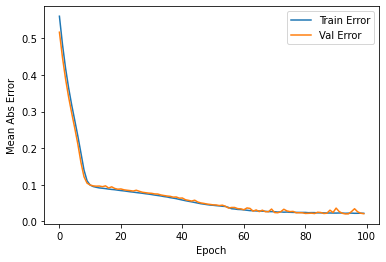

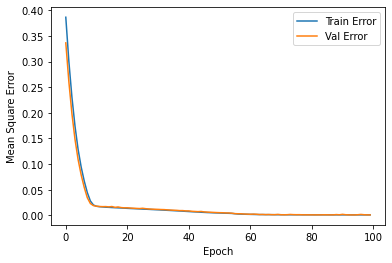

In [31]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.legend()
  plt.show()


plot_history(history)

# <font color='pink'>Prediction</font>

In [32]:
new_X = model.predict(X_test)

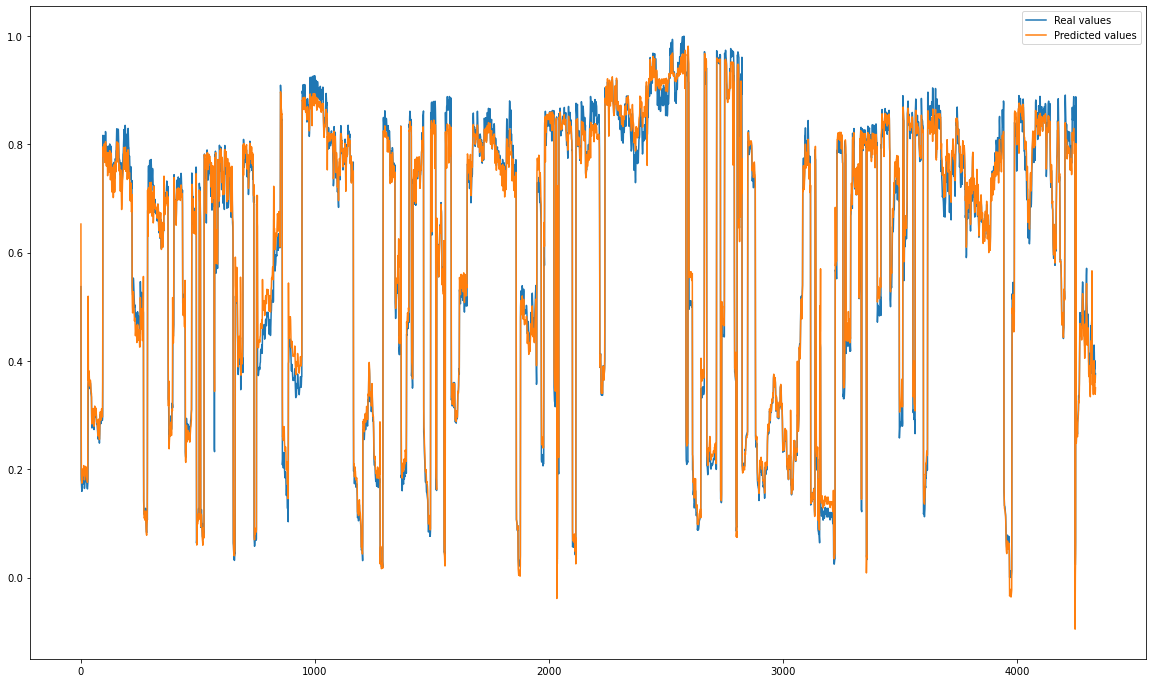

In [33]:
fig, ax = plt.subplots(1, figsize=(20, 12))
plt.plot(Y)
plt.plot(model.predict(X))
# plt.plot(new_X)
plt.legend(['Real values', 'Predicted values'], loc='upper right')

In [34]:
model.evaluate(X_test,  y_test, verbose=2)

34/34 - 0s - loss: 0.0010 - mae: 0.0214 - mse: 0.0010 - accuracy: 0.0000e+00 - mean_absolute_error: 0.0214


[0.0010168029693886638,
 0.021392513066530228,
 0.0010168029693886638,
 0.0,
 0.021392513066530228]

### <font color='pink'>Loading the final test set</font>

In [35]:
df_test

date     T_AMB     P_AMB    CMP_SPEED        CDP      GGDP  \
0    2021-01-01  0.721750  1.001484  6637.409665   5.832015  2.416738   
1    2021-01-02  1.620703  1.001503  6655.303505   5.836681  2.417710   
2    2021-01-03  3.749595  1.001464  6543.075166   5.623416  2.373094   
3    2021-01-04  5.191938  1.001513  6613.171548   5.688147  2.386764   
4    2021-01-05  4.352311  1.001577  5512.789368   4.925938  2.159933   
..          ...       ...       ...          ...        ...       ...   
361  2021-12-28  0.556936  1.001259  9581.296097  10.943736  3.310195   
362  2021-12-29  2.592521  1.001448  9633.012266  10.946756  3.310970   
363  2021-12-30  3.891744  1.001528  9551.116001  10.707009  3.274651   
364  2021-12-31  3.133677  1.001643  9653.783643  10.953271  3.312269   
365  2022-01-01  1.668004  1.000711  9614.130520  10.936971  3.308284   

          HPT_IT         CDT      LPT_IT       EXH_T          RH       WAR  
0    1099.669907  275.264798  825.126859  605.488705  100.000000  0.000040  
1    1104.272571  277.170383  828.722891  608.297352   99.855070  0.000043  
2    1124.078913  278.159658  849.668850  629.152504   91.417221  0.000045  
3    1128.688645  282.134434  851.746149  629.516608   81.896271  0.000045  
4    1124.503274  234.921546  847.820191  625.910410   86.960921  0.000045  
..           ...         ...         ...         ...         ...       ...  
361  1000.932318  330.194483  671.294771  426.943344   99.834936  0.000040  
362  1010.706713  334.722621  678.576614  432.367956   92.113491  0.000042  
363  1022.111812  336.310510  689.693045  442.587092   84.624853  0.000043  
364  1013.887527  336.136880  680.884325  434.041650   88.783879  0.000042  
365  1007.057302  332.857678  675.867629  430.356736  100.000000  0.000043  

[366 rows x 12 columns]

### <font color='pink'>Select the variables</font>

In [36]:
df_4test = df_test[['CMP_SPEED', 'CDP', 'GGDP', 'HPT_IT', 'CDT', 'LPT_IT', 'EXH_T']]

In [37]:
df_4test

CMP_SPEED        CDP      GGDP       HPT_IT         CDT      LPT_IT  \
0    6637.409665   5.832015  2.416738  1099.669907  275.264798  825.126859   
1    6655.303505   5.836681  2.417710  1104.272571  277.170383  828.722891   
2    6543.075166   5.623416  2.373094  1124.078913  278.159658  849.668850   
3    6613.171548   5.688147  2.386764  1128.688645  282.134434  851.746149   
4    5512.789368   4.925938  2.159933  1124.503274  234.921546  847.820191   
..           ...        ...       ...          ...         ...         ...   
361  9581.296097  10.943736  3.310195  1000.932318  330.194483  671.294771   
362  9633.012266  10.946756  3.310970  1010.706713  334.722621  678.576614   
363  9551.116001  10.707009  3.274651  1022.111812  336.310510  689.693045   
364  9653.783643  10.953271  3.312269  1013.887527  336.136880  680.884325   
365  9614.130520  10.936971  3.308284  1007.057302  332.857678  675.867629   

          EXH_T  
0    605.488705  
1    608.297352  
2    629.152504  
3    629.516608  
4    625.910410  
..          ...  
361  426.943344  
362  432.367956  
363  442.587092  
364  434.041650  
365  430.356736  

[366 rows x 7 columns]

### <font color='pink'>Scale the data between 0 and 1</font>

In [38]:
test_set_scaled = sc.fit_transform(df_4test)

In [39]:
X_test = test_set_scaled[:, 0:6]

In [40]:
X_test.shape

(366, 6)

### <font color='pink'>Use the model to predict POWER</font>

In [41]:
x_pred = model.predict(X_test)

In [42]:
x_pred

array([[ 0.33807737],
       [ 0.34553176],
       [ 0.3359046 ],
       [ 0.35428107],
       [ 0.3777374 ],
       [        nan],
       [ 0.7862146 ],
       [ 0.8721143 ],
       [ 0.8793342 ],
       [ 0.8730067 ],
       [ 0.87559843],
       [ 0.87707925],
       [ 0.8718656 ],
       [ 0.87279683],
       [ 0.8817108 ],
       [ 0.8768133 ],
       [ 0.8697871 ],
       [ 0.8619209 ],
       [ 0.8430586 ],
       [ 0.83813167],
       [ 0.84031594],
       [ 0.841675  ],
       [ 0.8401786 ],
       [ 0.82553744],
       [ 0.8165779 ],
       [ 0.82773834],
       [ 0.84007484],
       [ 0.8426461 ],
       [ 0.8389215 ],
       [ 0.8282756 ],
       [ 0.8156716 ],
       [ 0.8105221 ],
       [ 0.8214656 ],
       [ 0.82566947],
       [ 0.82080764],
       [ 0.8216694 ],
       [ 0.8177394 ],
       [        nan],
       [ 0.49162215],
       [        nan],
       [        nan],
       [        nan],
       [        nan],
       [        nan],
       [        nan],
       [  

### <font color='pink'>Convert the array into a df</font>

In [43]:
df_x_pred = pd.DataFrame(x_pred,
                        columns=['POWER'])

In [44]:
df_x_pred

POWER
0    0.338077
1    0.345532
2    0.335905
3    0.354281
4    0.377737
..        ...
361  0.888126
362  0.892737
363  0.886757
364  0.894855
365  0.890386

[366 rows x 1 columns]

In [45]:
df_final = df_test["date"]

In [46]:
df_final

0      2021-01-01
1      2021-01-02
2      2021-01-03
3      2021-01-04
4      2021-01-05
          ...    
361    2021-12-28
362    2021-12-29
363    2021-12-30
364    2021-12-31
365    2022-01-01
Name: date, Length: 366, dtype: object

In [47]:
df_final_2 = pd.DataFrame(df_final,
                        columns=['date'])

In [48]:
df_final_2

date
0    2021-01-01
1    2021-01-02
2    2021-01-03
3    2021-01-04
4    2021-01-05
..          ...
361  2021-12-28
362  2021-12-29
363  2021-12-30
364  2021-12-31
365  2022-01-01

[366 rows x 1 columns]

In [49]:
df_final_2['POWER'] = df_x_pred['POWER']

In [50]:
min = df['POWER'].min()
max = df['POWER'].max()

In [51]:
df_final_2['POWER']=df_final_2['POWER'].apply(lambda x: x*(max-min) + min) 

In [52]:
df_final_2

date         POWER
0    2021-01-01   7756.166165
1    2021-01-02   7867.207539
2    2021-01-03   7723.800407
3    2021-01-04   7997.538027
4    2021-01-05   8346.945800
..          ...           ...
361  2021-12-28  15949.741687
362  2021-12-29  16018.434020
363  2021-12-30  15929.355157
364  2021-12-31  16049.974053
365  2022-01-01  15983.411735

[366 rows x 2 columns]

In [53]:
df_final_2['POWER'] = df_final_2['POWER'].fillna(0)

In [54]:
df_final_2

date         POWER
0    2021-01-01   7756.166165
1    2021-01-02   7867.207539
2    2021-01-03   7723.800407
3    2021-01-04   7997.538027
4    2021-01-05   8346.945800
..          ...           ...
361  2021-12-28  15949.741687
362  2021-12-29  16018.434020
363  2021-12-30  15929.355157
364  2021-12-31  16049.974053
365  2022-01-01  15983.411735

[366 rows x 2 columns]

### <font color='pink'>Set the correct date format</font>

In [55]:
BaseFinal = [df_final, df_final_2['POWER']]                                                                       # Ivana's code
headers = ["date", "POWER"]

df3 = pd.concat(BaseFinal, axis=1, keys=headers)
df3

date         POWER
0    2021-01-01   7756.166165
1    2021-01-02   7867.207539
2    2021-01-03   7723.800407
3    2021-01-04   7997.538027
4    2021-01-05   8346.945800
..          ...           ...
361  2021-12-28  15949.741687
362  2021-12-29  16018.434020
363  2021-12-30  15929.355157
364  2021-12-31  16049.974053
365  2022-01-01  15983.411735

[366 rows x 2 columns]

In [56]:
Array = df3[['date']].to_numpy()                                                                                  # Ivana's code

In [57]:
Array                                                                                                        

array([['2021-01-01'],
       ['2021-01-02'],
       ['2021-01-03'],
       ['2021-01-04'],
       ['2021-01-05'],
       ['2021-01-06'],
       ['2021-01-07'],
       ['2021-01-08'],
       ['2021-01-09'],
       ['2021-01-10'],
       ['2021-01-11'],
       ['2021-01-12'],
       ['2021-01-13'],
       ['2021-01-14'],
       ['2021-01-15'],
       ['2021-01-16'],
       ['2021-01-17'],
       ['2021-01-18'],
       ['2021-01-19'],
       ['2021-01-20'],
       ['2021-01-21'],
       ['2021-01-22'],
       ['2021-01-23'],
       ['2021-01-24'],
       ['2021-01-25'],
       ['2021-01-26'],
       ['2021-01-27'],
       ['2021-01-28'],
       ['2021-01-29'],
       ['2021-01-30'],
       ['2021-01-31'],
       ['2021-02-01'],
       ['2021-02-02'],
       ['2021-02-03'],
       ['2021-02-04'],
       ['2021-02-05'],
       ['2021-02-06'],
       ['2021-02-07'],
       ['2021-02-08'],
       ['2021-02-09'],
       ['2021-02-10'],
       ['2021-02-11'],
       ['2021-02-12'],
       ['20

In [58]:
def formatito (jj):                                                                                               # Ivana's code
  #jj es una fecha, que se encuentra en formado array eg.['2021-01-01']

  ll=jj.split('-')
  p=len(ll)

  for i in range(0,p):
    temp=int(ll[i])
    ll[i]=str(temp)
  for i in range(0,p):
    if i==1:
      tempo=ll[i]
      print(tempo)
      tempa=ll[i+1]
      print(tempa)
      ll[i+1]=tempo
      ll[i]=tempa
    
  ll.reverse()
  nuevall=['/'.join(ll)]
  return(nuevall)

In [59]:
def formatos (Array):                                                                                             # Ivana's code
  NuevoArray=[]
  renglones,columnas=Array.shape
  for i in range(0,renglones):
    for j in range(0,columnas):
      jj=Array[i,j]
      #print(jj)
      NuevoArray.append(formatito(jj))
  NuevoArray=np.array(NuevoArray)
  return(NuevoArray)

In [60]:
Konda= formatos(Array)

1
1
1
2
1
3
1
4
1
5
1
6
1
7
1
8
1
9
1
10
1
11
1
12
1
13
1
14
1
15
1
16
1
17
1
18
1
19
1
20
1
21
1
22
1
23
1
24
1
25
1
26
1
27
1
28
1
29
1
30
1
31
2
1
2
2
2
3
2
4
2
5
2
6
2
7
2
8
2
9
2
10
2
11
2
12
2
13
2
14
2
15
2
16
2
17
2
18
2
19
2
20
2
21
2
22
2
23
2
24
2
25
2
26
2
27
2
28
3
1
3
2
3
3
3
4
3
5
3
6
3
7
3
8
3
9
3
10
3
11
3
12
3
13
3
14
3
15
3
16
3
17
3
18
3
19
3
20
3
21
3
22
3
23
3
24
3
25
3
26
3
27
3
28
3
29
3
30
3
31
4
1
4
2
4
3
4
4
4
5
4
6
4
7
4
8
4
9
4
10
4
11
4
12
4
13
4
14
4
15
4
16
4
17
4
18
4
19
4
20
4
21
4
22
4
23
4
24
4
25
4
26
4
27
4
28
4
29
4
30
5
1
5
2
5
3
5
4
5
5
5
6
5
7
5
8
5
9
5
10
5
11
5
12
5
13
5
14
5
15
5
16
5
17
5
18
5
19
5
20
5
21
5
22
5
23
5
24
5
25
5
26
5
27
5
28
5
29
5
30
5
31
6
1
6
2
6
3
6
4
6
5
6
6
6
7
6
8
6
9
6
10
6
11
6
12
6
13
6
14
6
15
6
16
6
17
6
18
6
19
6
20
6
21
6
22
6
23
6
24
6
25
6
26
6
27
6
28
6
29
6
30
7
1
7
2
7
3
7
4
7
5
7
6
7
7
7
8
7
9
7
10
7
11
7
12
7
13
7
14
7
15
7
16
7
17
7
18
7
19
7
20
7
21
7
22
7
23
7
24
7
25
7
26
7
27
7
28
7
29
7
30
7
31
8
1

In [61]:
Fechisimas = pd.DataFrame(Konda)                                                                                  # Ivana's code
Fechisimas

0
0      1/1/2021
1      1/2/2021
2      1/3/2021
3      1/4/2021
4      1/5/2021
..          ...
361  12/28/2021
362  12/29/2021
363  12/30/2021
364  12/31/2021
365    1/1/2022

[366 rows x 1 columns]

In [62]:
df3['date']=Fechisimas.values                                                                                     # Ivana's code

# <font color='pink'>Final result</font>

In [63]:
df3

date         POWER
0      1/1/2021   7756.166165
1      1/2/2021   7867.207539
2      1/3/2021   7723.800407
3      1/4/2021   7997.538027
4      1/5/2021   8346.945800
..          ...           ...
361  12/28/2021  15949.741687
362  12/29/2021  16018.434020
363  12/30/2021  15929.355157
364  12/31/2021  16049.974053
365    1/1/2022  15983.411735

[366 rows x 2 columns]

In [64]:
df3 = df3.fillna(0)

In [65]:
df3.to_csv('POWER.csv', index = None)

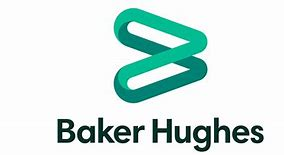

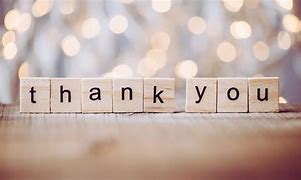